In [2]:
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
channels = 3
EPOCHS = 50

In [4]:
directory = "../archive/PlantVillage"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [5]:
class_names = dataset.class_names

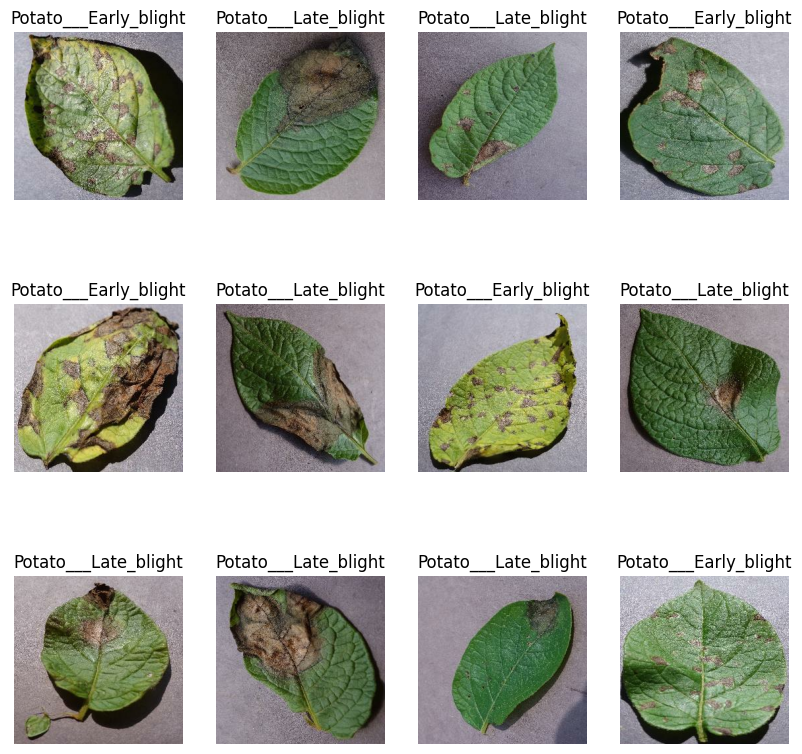

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)   
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off") 

In [10]:
len(dataset)

68

In [ ]:
#80% as training
#20%: 10% validation 10% testing

In [ ]:
train_size = 0.8
train_dataset = dataset.take(54)
len(train_dataset)


54

In [14]:
test_ds = dataset.skip(54)
len(test_ds)
val_size = 0.1
len(dataset)*val_size


6.800000000000001

In [ ]:
val_dataset = test_ds.take(6)
test_dataset = test_ds.skip(6) 

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle= True, shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split*ds_size)
    validation_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(validation_size) 
    test_ds = ds.skip(train_size).take(validation_size)
    return train_ds, val_ds, test_ds